## Erste Versuche mit OSMNX



In [140]:
import networkx as nx
import osmnx as ox
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import random
import math

/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


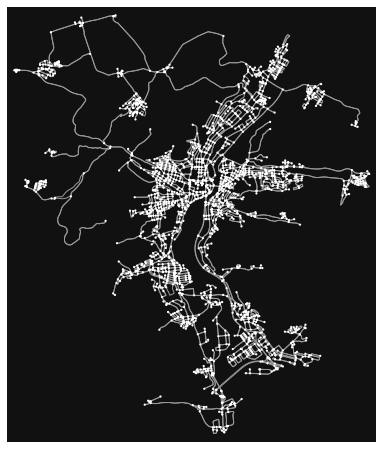

In [2]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Jena, Germany", network_type="drive")
fig, ax = ox.plot_graph(G, node_size=5)

In [6]:
list(G.nodes)

[486374,
 486611,
 31918151,
 31918156,
 31993078,
 31993087,
 31993103,
 31993385,
 31995360,
 31995366,
 31995540,
 31995620,
 31996209,
 32125579,
 32125585,
 32127618,
 32127691,
 32127701,
 32127714,
 32127760,
 32127783,
 32463724,
 32463783,
 32463787,
 32463826,
 32463829,
 33322510,
 33322828,
 33322856,
 33323084,
 35304293,
 35304303,
 35304309,
 35304319,
 35304335,
 35304352,
 35304357,
 35304360,
 35304363,
 35304375,
 35304395,
 35304401,
 35304404,
 35304416,
 35304433,
 35304438,
 35304624,
 35304625,
 35304629,
 35304634,
 35304702,
 35304709,
 35304755,
 35304757,
 35304767,
 35304837,
 35304845,
 35304855,
 35304870,
 35304875,
 35304885,
 35304894,
 35304896,
 35305560,
 35305562,
 49261948,
 49261986,
 49262173,
 49262185,
 49314791,
 49314799,
 49314800,
 49314883,
 49315015,
 49315060,
 49315068,
 49315070,
 49315173,
 49319083,
 51207548,
 52025442,
 52025629,
 52028042,
 52028044,
 52028052,
 52028066,
 52028413,
 52055140,
 52055145,
 52055148,
 52055153,
 52

In [3]:
type(G.nodes.data())

networkx.classes.reportviews.NodeDataView

In [4]:
x_index_and_values=list(G.nodes.data("x"))
y_index_and_values=list(G.nodes.data("y"))
Num_Nodes=len(x_index_and_values)

In [5]:
print(x_index_and_values[3][1])

11.5972133


In [6]:
X=np.zeros(2*Num_Nodes)
X=X.reshape(Num_Nodes,2)
for i in range(Num_Nodes):
    X[i,0]=x_index_and_values[i][1]
    X[i,1]=y_index_and_values[i][1]

In [7]:
clustering = DBSCAN(eps=0.01, min_samples=5).fit(X)

In [86]:
clustering.labels_
for i in range(Num_Nodes):
    if clustering.labels_[i]!=0:
        print(i)

13
14
15
19
27
28
72
121
122
124
129
131
132
133
362
443
454
455
456
482
497
498
499
500
646
647
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
902
903
904
923
924
925
926
964
965
983
984
985
986
987
1019
1081
1082
1125
1126
1127
1128
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177
1178
1179
1180
1181
1182
1183
1184
1185
1186
1187
1188
1189
1190
1191
1192
1198
1199
1200
1201
1202
1209
1215
1216
1217
1218
1219
1220
1221
1222
1223
1224
1225
1226
1227
1245
1246
1267
1268
1269
1270
1271
1272
1273
1275
1278
1279
1281
1283
1285
1286
1304
1305
1306
1320
1322
1323
1324
1325
1326
1327
1328
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1356
1357
1364
1365
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1399
1400
1401
1402
1403
1404
1438
1444
1454
1455
1481
1482
1484
1485
1486
1513
1521
1522
1523
1524
1525
15

NameError: name 'plt' is not defined

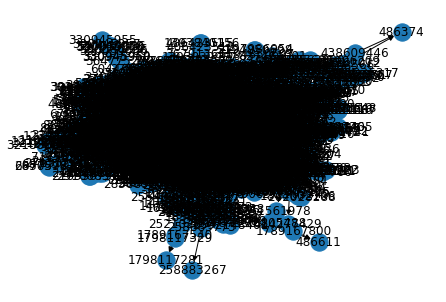

In [87]:
nx.draw(G,with_labels=True)
plt.show()

In [12]:
col_list=[]
for i in range(int(Num_Nodes)):
    random.seed(clustering.labels_[i])
    col_list.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))    

In [105]:
len(col_list)

2222

In [103]:
"#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

'#48514F'

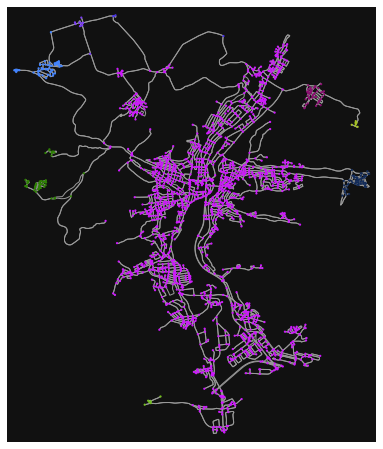

In [13]:
fig, ax = ox.plot_graph(G, node_size=5,node_color=col_list)

In [79]:
print(clustering)

DBSCAN(eps=5, min_samples=4)


In [80]:
print(X)

[[11.6241041 50.8789929]
 [11.5935316 50.8719092]
 [11.5979319 50.8676555]
 ...
 [11.5827954 50.9231636]
 [11.5829731 50.9231385]
 [11.5649047 50.9213532]]


In [55]:
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
486374,50.878993,11.624104,3,NaN,NaN,POINT (11.62410 50.87899)
486611,50.871909,11.593532,3,NaN,NaN,POINT (11.59353 50.87191)
31918151,50.867655,11.597932,4,NaN,NaN,POINT (11.59793 50.86766)
31918156,50.872317,11.597213,3,motorway_junction,NaN,POINT (11.59721 50.87232)
31993078,50.867541,11.599958,3,NaN,NaN,POINT (11.59996 50.86754)


In [5]:
gdf_edges.head(10)

osmid lanes  \
u        v          key                                                       
31918151 3579364826 0                                         4903733     2   
         271959925  0    [170709723, 157504029, 157504014, 199998366]     2   
         31993078   0                            [4903732, 270937839]     2   
         31993087   0               [317664121, 270937836, 270937837]     2   
31918156 1478289439 0                                       134465497     1   
         1789167540 0                                       134465550     2   
31993078 31918151   0                            [4903732, 270937839]     2   
         31995620   0                                         4903771     2   
         31993087   0                [23734531, 187161107, 270937838]   NaN   
31993087 1270681906 0                                        24785229     2   

                          ref                           name  \
u        v          key                                        
31918151 3579364826 0     K 2                   Am Dorfplatz   
         271959925  0     NaN                            NaN   
         31993078   0     NaN               Alter Handelsweg   
         31993087   0     K 2  [Am Leutrabach, Am Dorfplatz]   
31918156 1478289439 0     NaN                            NaN   
         1789167540 0    B 88                            NaN   
31993078 31918151   0     NaN               Alter Handelsweg   
         31995620   0     NaN               Alter Handelsweg   
         31993087   0     NaN                  An der Kirche   
31993087 1270681906 0     K 2                  Am Leutrabach   

                                             highway  maxspeed  oneway  \
u        v          key                                                  
31918151 3579364826 0                       tertiary        50   False   
         271959925  0                       tertiary        50   False   
         31993078   0    [unclassified, residential]  [50, 30]   False   
         31993087   0                       tertiary  [50, 30]   False   
31918156 1478289439 0                     trunk_link        50    True   
         1789167540 0                          trunk        80    True   
31993078 31918151   0    [unclassified, residential]  [50, 30]   False   
         31995620   0                   unclassified        30   False   
         31993087   0                    residential       NaN   False   
31993087 1270681906 0                       tertiary        30   False   

                          length  \
u        v          key            
31918151 3579364826 0     53.912   
         271959925  0    160.711   
         31993078   0    179.312   
         31993087   0    255.956   
31918156 1478289439 0    161.180   
         1789167540 0    367.312   
31993078 31918151   0    179.312   
         31995620   0     31.139   
         31993087   0    145.498   
31993087 1270681906 0     23.243   

                                                                  geometry  \
u        v          key                                                      
31918151 3579364826 0    LINESTRING (11.59793 50.86766, 11.59775 50.867...   
         271959925  0    LINESTRING (11.59793 50.86766, 11.59792 50.867...   
         31993078   0    LINESTRING (11.59793 50.86766, 11.59799 50.867...   
         31993087   0    LINESTRING (11.59793 50.86766, 11.59804 50.867...   
31918156 1478289439 0    LINESTRING (11.59721 50.87232, 11.59726 50.872...   
         1789167540 0    LINESTRING (11.59721 50.87232, 11.59730 50.872...   
31993078 31918151   0    LINESTRING (11.59996 50.86754, 11.59983 50.867...   
         31995620   0    LINESTRING (11.59996 50.86754, 11.60000 50.867...   
         31993087   0    LINESTRING (11.59996 50.86754, 11.59999 50.867...   
31993087 1270681906 0    LINESTRING (11.60103 50.86847, 11.60134 50.86853)   

                        bridge width tunnel access area junction  
u        v          

### Questions:
- How to interpret the coordinates?

In [14]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

98249473.52678213

## Einige Daten über das Netzwerk:

In [15]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/simplification.py:423: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return gpd.GeoSeries(list(merged), crs=G.graph["crs"])
/home/daniel/anaconda3/lib/python3.8/site-packages/osmnx/simplification.py:423: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return gpd.GeoSeries(list(merged), crs=G.graph["crs"])


{'n': 2222,
 'm': 5464,
 'k_avg': 4.918091809180918,
 'edge_length_total': 729022.3760000002,
 'edge_length_avg': 133.42283601756958,
 'streets_per_node_avg': 2.677767776777678,
 'streets_per_node_counts': {0: 0, 1: 473, 2: 31, 3: 1467, 4: 242, 5: 8, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.21287128712871287,
  2: 0.01395139513951395,
  3: 0.6602160216021602,
  4: 0.10891089108910891,
  5: 0.0036003600360036,
  6: 0.00045004500450045},
 'intersection_count': 1749,
 'street_length_total': 398313.20899999916,
 'street_segment_count': 2967,
 'street_length_avg': 134.24779541624508,
 'circuity_avg': 1.0914536484314419,
 'self_loop_proportion': 0.005729693292888439,
 'clean_intersection_count': 1386,
 'node_density_km': 22.615897268846922,
 'intersection_density_km': 17.801622107656737,
 'edge_density_km': 7420.114834521467,
 'street_density_km': 4054.100187024633,
 'clean_intersection_density_km': 14.106945821161942}

Erklärung in https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=ox.basic_stats#osmnx.stats.basic_stats

n:= Number of Nodes
m:= Number of edges
k_avg Average Degree of a node

In [7]:
# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

## Kmean


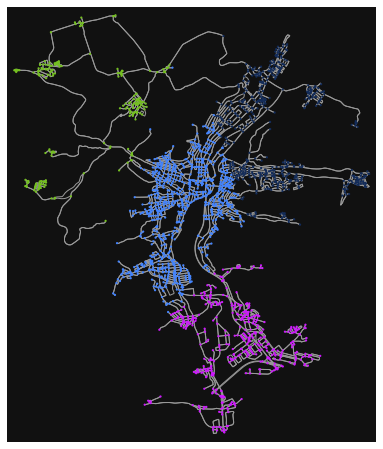

[[11.60369    50.88521512]
 [11.58111102 50.9223828 ]
 [11.62224064 50.94251696]
 [11.53745887 50.94979859]]


In [45]:
model=KMeans(4)
model.fit(X)
centers = np.array(model.cluster_centers_)

len(model.labels_)

col_list=[]
for i in range(int(Num_Nodes)):
    random.seed(model.labels_[i])
    col_list.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))  
fig, ax = ox.plot_graph(G, node_size=5,node_color=col_list)
ax.scatter(centers[:,0], centers[:,1], marker="x", color='r',s=1000)
print(centers)

In [46]:
G.nodes()

NodeView((486374, 486611, 31918151, 31918156, 31993078, 31993087, 31993103, 31993385, 31995360, 31995366, 31995540, 31995620, 31996209, 32125579, 32125585, 32127618, 32127691, 32127701, 32127714, 32127760, 32127783, 32463724, 32463783, 32463787, 32463826, 32463829, 33322510, 33322828, 33322856, 33323084, 35304293, 35304303, 35304309, 35304319, 35304335, 35304352, 35304357, 35304360, 35304363, 35304375, 35304395, 35304401, 35304404, 35304416, 35304433, 35304438, 35304624, 35304625, 35304629, 35304634, 35304702, 35304709, 35304755, 35304757, 35304767, 35304837, 35304845, 35304855, 35304870, 35304875, 35304885, 35304894, 35304896, 35305560, 35305562, 49261948, 49261986, 49262173, 49262185, 49314791, 49314799, 49314800, 49314883, 49315015, 49315060, 49315068, 49315070, 49315173, 49319083, 51207548, 52025442, 52025629, 52028042, 52028044, 52028052, 52028066, 52028413, 52055140, 52055145, 52055148, 52055153, 52055177, 84524332, 84524401, 84524497, 84524588, 84524633, 84524808, 84524852, 8452

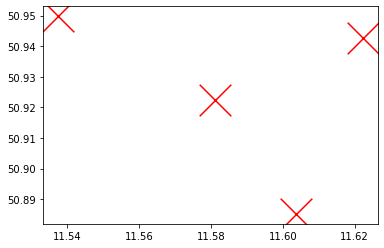

In [42]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r',s=1000)

In [78]:
lis_nodes_test=ox.distance.shortest_path(G, 31918156, 31918151, weight='length', cpus=1)
print(lis_nodes_test)
gdf_nodes.head()
type(gdf_nodes.head())
G.nodes[31918156]["x"]
dist=0
for i in range(len(lis_nodes_test)-1):
        node_1=lis_nodes_test[i]
        node_2=lis_nodes_test[i+1]
        x_1=G.nodes[node_1]["x"]
        y_1=G.nodes[node_1]["y"]
        x_2=G.nodes[node_2]["x"]
        y_2=G.nodes[node_2]["y"]
        curr_dis=ox.distance.euclidean_dist_vec(x_1,y_1,x_2,y_2)
        dist+=curr_dis
print(dist)
x_1=G.nodes[31918156]["x"]
y_1=G.nodes[31918156]["y"]
x_2=G.nodes[31918151]["x"]
y_2=G.nodes[31918151]["y"]
print(ox.distance.euclidean_dist_vec(x_1,y_1,x_2,y_2))

[31918156, 1478289439, 1789167697, 1478289425, 1478289401, 1478289398, 1789167671, 1789167670, 271959925, 31918151]
0.006245239478364029
0.004716859675675107


In [84]:
G.edges[(31918156, 1478289439,0)]["length"]

161.18000000000004

In [131]:
lis_nodes_test=ox.distance.shortest_path(G, 31918156, 31918151, weight='length', cpus=1)
#print(lis_nodes_test)
#gdf_nodes.head()
#type(gdf_nodes.head())
#G.nodes[31918156]["x"]
dist=0
for i in range(len(lis_nodes_test)-1):
        node_1=lis_nodes_test[i]
        node_2=lis_nodes_test[i+1]
        curr_dis=G.edges[(node_1,node_2,0)]["length"]
        dist+=curr_dis
print(dist)
print(ox.distance.euclidean_dist_vec(y_1,x_1,y_2,x_2)*71/111*(abs(x_1-x_2)/abs(y_1-y_2))*1000)
print(x_1,x_2,y_1,y_2)

664.6490000000001
0.4650738294433033
11.5972133 11.5979319 50.8723173 50.8676555


In [133]:

x_1=G.nodes[31918156]["x"]
x_2=G.nodes[31918151]["x"]
y_1=G.nodes[31918156]["y"]
y_2=G.nodes[31918151]["y"]
print(x_1)
print(math.sqrt(((x_1-x_2)*71)**2+((y_1-y_2)*111)**2)*1000)

11.5972133
519.9689858448419


In [105]:
G.nodes[31918156]["x"]

11.5972133

In [142]:
def euclidean_weighted(x_1,x_2,y_1,y_2):
    return(math.sqrt(((x_1-x_2)*71)**2+((y_1-y_2)*111)**2)*1000)
def length_between_nodes(n_1,n_2):
    lis_nodes_test=ox.distance.shortest_path(G, n_1,n_2, weight='length', cpus=1)
    dist=0
    for i in range(len(lis_nodes_test)-1):
        node_1=lis_nodes_test[i]
        node_2=lis_nodes_test[i+1]
        curr_dis=G.edges[(node_1,node_2,0)]["length"]
        dist+=curr_dis
    return dist
print(length_between_nodes(31918156,31918151))
def euc_between_nodes(n_1,n_2):
    x_1=G.nodes[n_1]["x"]
    x_2=G.nodes[n_2]["x"]
    y_1=G.nodes[n_1]["y"]
    y_2=G.nodes[n_2]["y"]
    return (euclidean_weighted(x_1,x_2,y_1,y_2))
euc_between_nodes(31918156,31918151)

664.6490000000001


519.9689858448419

In [160]:
G.nodes[2030]

KeyError: 2030

In [174]:
list_of_nodes=list(G.nodes())
m=10
list_of_random_nodes=random.sample(range(0, 2222), m)
street_dist=np.zeros(m*m)
street_dist=street_dist.reshape(m,m)

euc_dist=np.zeros(m*m).reshape(m,m)

for i in range(m):
    for j in range(m):
        if(i!=j):
            node_i=list_of_nodes[i]
            node_j=list_of_nodes[j]
            #print(node_i,node_j)
            if(ox.distance.shortest_path(G, node_i,node_j, weight='length', cpus=1)!= None):
                street_dist[i][j]=length_between_nodes(node_i,node_j)
                euc_dist[i][j]=euc_between_nodes(node_i,node_j)
#print(euc_dist)
#print("gsd")
#print(street_dist)
print(street_dist-euc_dist)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.75004646e+02  1.23206001e+03  0.00000000e+00  1.22555001e+03
   3.48924497e+01  1.82374087e+01  2.44397781e+01  1.25066185e+03
   4.95849946e+02  5.37488450e+02]
 [ 7.64833955e+02  1.42046331e+03  1.44680014e+02  0.00000000e+00
   2.79119214e+02  4.14974788e+02  4.06971112e+02  1.14614583e+03
   3.85414488e+02  4.43021076e+02]
 [ 1.16436225e+03  1.31174337e+03  3.48924497e+01  1.35998921e+03
   0.00000000e+00  1.73666993e+01  3.96964926e+01  1.53629304e+03
   2.68883528e+02  2.96876156e+02]
 [ 1.36313127e+03  1.39923157e+03  1.82374087e+01  1.49584479e+03
   1.73666993e+01  0.00000000e+00  4.98069111e+00  1.73665500e+03
   2.86846595e+02  3.14254681e+02

In [167]:
length_between_nodes(31918156,31918151)
print(ox.distance.shortest_path(G, 486374,486611, weight='length', cpus=1))

None


## Routing befor add Speed and times

In [98]:
# get the nearest network nodes to two lat/lng points with the distance module
#orig = ox.distance.nearest_nodes(G, X=G.nodes[31918156]["x"], G.nodes[31918156]["y"])
#dest = ox.distance.nearest_nodes(G, X=G.nodes[31918151]["x"], G.nodes[31918151]["y"])
orig = ox.distance.nearest_nodes(G, X=0, Y=0)
dest = ox.distance.nearest_nodes(G,X=-122.245846, Y=37.828903)

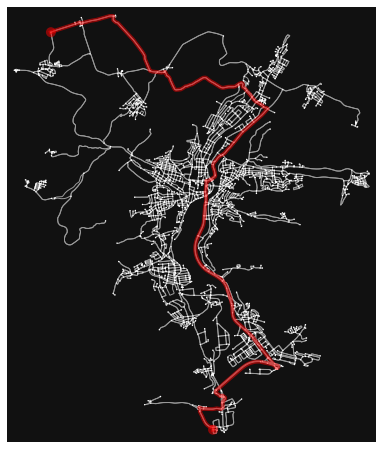

In [99]:
# find the shortest path between nodes, minimizing travel time, then plot it0
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=2)

## AD Speed and times

In [10]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

Sets speed in kph by maxspeed mean of highway typ (If type is not none, then mean of all highway types)

Sets time by length and speed of an edge in seconds

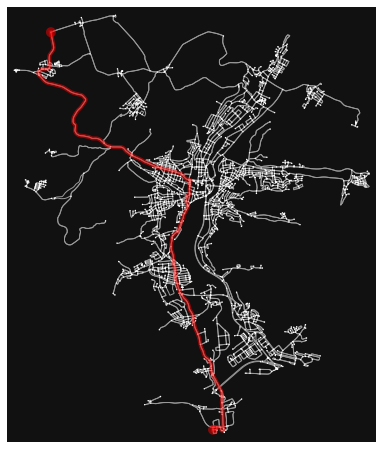

In [11]:
# find the shortest path between nodes, minimizing travel time, then plot it0
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=2)

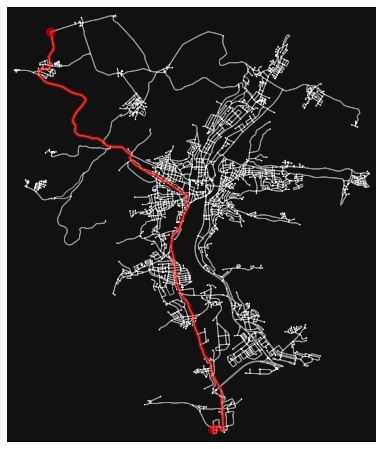

In [12]:
# find the shortest path between nodes, minimizing travel time, then plot it0
route = ox.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, node_size=2)

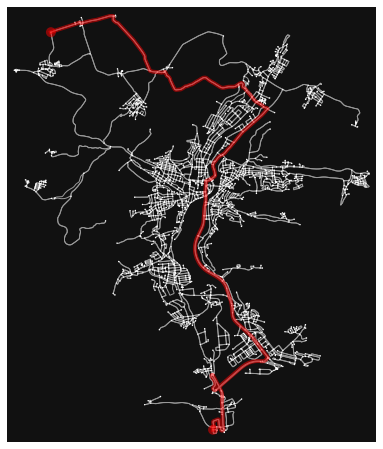

In [13]:
# find the shortest path between nodes, minimizing travel time, then plot it0
route = ox.shortest_path(G, orig, dest, weight="speed")
fig, ax = ox.plot_graph_route(G, route, node_size=2)

## Questions
- How did the programm worked with weights befor?
- How to transform real GPS Data into that coordninates in the map?

In [14]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
#Nach dem Neu Einlesen sind die neuen Attribute speed_kph and travel_time vorhanden im Graphen

In [15]:
gdf_edges.head(10)

osmid lanes  \
u        v          key                                                       
31918151 3579364826 0                                         4903733     2   
         271959925  0    [170709723, 157504029, 157504014, 199998366]     2   
         31993078   0                            [4903732, 270937839]     2   
         31993087   0               [317664121, 270937836, 270937837]     2   
31918156 1478289439 0                                       134465497     1   
         1789167540 0                                       134465550     2   
31993078 31918151   0                            [4903732, 270937839]     2   
         31995620   0                                         4903771     2   
         31993087   0                [23734531, 187161107, 270937838]   NaN   
31993087 1270681906 0                                        24785229     2   

                          ref                           name  \
u        v          key                                        
31918151 3579364826 0     K 2                   Am Dorfplatz   
         271959925  0     NaN                            NaN   
         31993078   0     NaN               Alter Handelsweg   
         31993087   0     K 2  [Am Leutrabach, Am Dorfplatz]   
31918156 1478289439 0     NaN                            NaN   
         1789167540 0    B 88                            NaN   
31993078 31918151   0     NaN               Alter Handelsweg   
         31995620   0     NaN               Alter Handelsweg   
         31993087   0     NaN                  An der Kirche   
31993087 1270681906 0     K 2                  Am Leutrabach   

                                             highway  maxspeed  oneway  \
u        v          key                                                  
31918151 3579364826 0                       tertiary        50   False   
         271959925  0                       tertiary        50   False   
         31993078   0    [unclassified, residential]  [50, 30]   False   
         31993087   0                       tertiary  [50, 30]   False   
31918156 1478289439 0                     trunk_link        50    True   
         1789167540 0                          trunk        80    True   
31993078 31918151   0    [unclassified, residential]  [50, 30]   False   
         31995620   0                   unclassified        30   False   
         31993087   0                    residential       NaN   False   
31993087 1270681906 0                       tertiary        30   False   

                          length  \
u        v          key            
31918151 3579364826 0     53.912   
         271959925  0    160.711   
         31993078   0    179.312   
         31993087   0    255.956   
31918156 1478289439 0    161.180   
         1789167540 0    367.312   
31993078 31918151   0    179.312   
         31995620   0     31.139   
         31993087   0    145.498   
31993087 1270681906 0     23.243   

                                                                  geometry  \
u        v          key                                                      
31918151 3579364826 0    LINESTRING (11.59793 50.86766, 11.59775 50.867...   
         271959925  0    LINESTRING (11.59793 50.86766, 11.59792 50.867...   
         31993078   0    LINESTRING (11.59793 50.86766, 11.59799 50.867...   
         31993087   0    LINESTRING (11.59793 50.86766, 11.59804 50.867...   
31918156 1478289439 0    LINESTRING (11.59721 50.87232, 11.59726 50.872...   
         1789167540 0    LINESTRING (11.59721 50.87232, 11.59730 50.872...   
31993078 31918151   0    LINESTRING (11.59996 50.86754, 11.59983 50.867...   
         31995620   0    LINESTRING (11.59996 50.86754, 11.60000 50.867...   
         31993087   0    LINESTRING (11.59996 50.86754, 11.59999 50.867...   
31993087 1270681906 0    LINESTRING (11.60103 50.86847, 11.60134 50.86853)   

                         speed_kph  travel_time bridge width tunnel access  \
u        